In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from user_agents import parse


In [2]:
# Import the data from the json file
# Data is in format {},{},{},... and in a text file

# Read the data from the file
with open('../../Dataset/build_dataset.txt') as f:
    data = f.readlines()

# Convert the data to a list of dictionaries
data = [json.loads(x.strip()) for x in data]

In [3]:
# Function to create a histogram
def create_histogram(x, y, title, xlabel, ylabel='Visitors', color='blue'):
    # Create a figure
    plt.figure(figsize=(10, 8))
    # Create a bar plot
    plt.bar(x, y, color=color, edgecolor='black')
    # Add a title and axis labels
    plt.title(title)
    # Print x label
    plt.xlabel(xlabel)
    # Print y label
    plt.ylabel(ylabel)
    # Rotate xticks
    plt.xticks(rotation=90)
    # Show the plot
    plt.show()

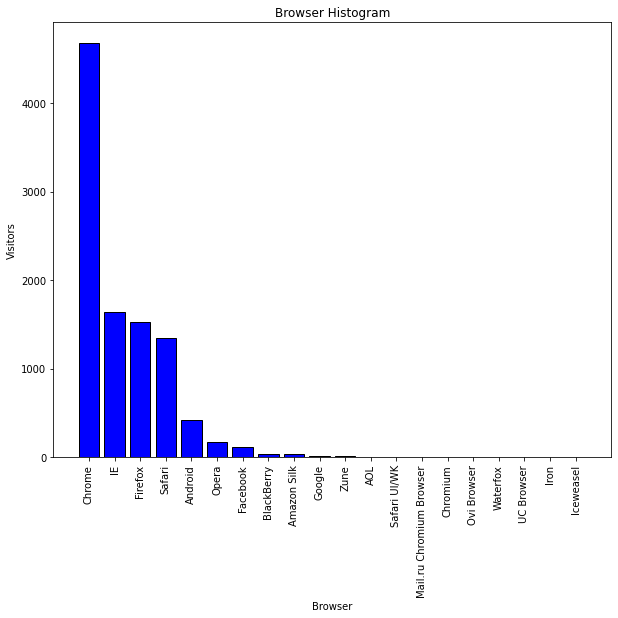

In [4]:
# Function to get the browser from the user agent
def get_browser(data):
     
    browsers = []
    for record in data:
        if 'visitor_useragent' in record:
            user_agent = parse(record['visitor_useragent'])
            # Just get the main browser family name without version or device
            browser_family = user_agent.browser.family
            # For more grouping, you can add conditions here to group by general browser type
            if 'Mobile' in browser_family or 'Tablet' in browser_family or 'iOS' in browser_family or 'WebView' in browser_family or 'WebKit' in browser_family:
                browser_family = browser_family.replace('Mobile', '').replace('Tablet', '').replace('iOS', '').replace('WebView', '').replace('WebKit', '')
            #trim whitespace
            browser_family = browser_family.strip()
            browsers.append(browser_family)
    return browsers

# Get browser counts
browser_counts = Counter(get_browser(data))

# Sort and unpack for plotting
sorted_browser_counts = sorted(browser_counts.items(), key=lambda x: x[1], reverse=True)
browsers, counts = zip(*sorted_browser_counts)

# Print results and create histogra,
create_histogram(browsers, counts, 'Browser Histogram', 'Browser')
